# Fazer plots básicos de todos os resultados experimentais

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab as cm
import numpy as np

import os

In [2]:
def read_file(file_path, columns = 5):
    with open(file_path, 'r') as file:
        dados = file.readlines()

    cor1_x  = list()
    cor1_y  = list()

    cor2_x  = list()
    cor2_y  = list()

    tempo   = list()

    for linha in dados[2:]:
        var      = linha.split()
        
        if len(var) == columns:
            tempo   += [float(var[0].replace(',','.'))]

            cor1_x  += [float(var[1].replace(',','.'))]
            cor1_y  += [float(var[2].replace(',','.').replace('\x00', ''))]
            
            if columns > 3:
                cor2_x  += [float(var[3].replace(',','.'))]
                cor2_y  += [float(var[4].replace(',','.').replace('\x00', ''))]
    if columns > 3:
        return tempo, cor1_x, cor1_y, cor2_x, cor2_y
    return tempo, cor1_x, cor1_y

In [3]:
colors = cm.get_cmap('tab10', 2)

mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 22
plt.rcParams['axes.linewidth'] = 2

colors = cm.get_cmap('tab10', 2)

def save_plot(tempo, x, y, filename, xlim=False, ylim=False):
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    
    if (xlim):
        ax.set_xlim(xlim[0], xlim[1])
    if (ylim):
        ax.set_ylim(ylim[0], ylim[1])
        
    ax.set_xlabel('Tempo (s)', labelpad=10)
    ax.set_ylabel('Amplitude (m)', labelpad=10)
    plt.title(filename)

    ax.plot(tempo, x, lw = '2', color=colors(0), label="Laser Verde y")
    ax.plot(tempo, y, lw = '2', color=colors(1), label="Laser Verde x")

    plt.axhline(0, linestyle='--')

    ax.legend(loc=1, frameon=False, fontsize=16)
    plt.savefig('Raw_DataPlots/' + filename + '.png', transparent=False, bbox_inches='tight')

found Dados/h5p5a4b10_2b.txt
found Dados/h5p5a2b10_2b.txt
found Dados/h2a6b40_3b.txt
found Dados/h4a2b20_5b.txt
found Dados/h4a6b40_3b_ensaio2.txt
found Dados/h6a6b10_3b.txt
found Dados/h6am2b40_4b_ensaio3.txt
found Dados/h4a6b40_3b.txt
found Dados/h6am2b40_4b_ensaio2.txt
found Dados/h6am2b40_4b.txt
found Dados/h4B40A1.txt
found Dados/h4a6b10_5b_.txt
found Dados/h4a6b10_5b_ensaio2.txt
found Dados/h6B20A2.txt
found Dados/h2a2b40_3b.txt
found Dados/h2a6b30_2b.txt
found Dados/h2a4b40_4b.txt
found Dados/h4a4b10_5b_.txt
found Dados/h4a4b10_barreira25_5b.txt
found Dados/h8B10A2.txt
found Dados/h2a6b10_2b.txt


/Users/thomasgaehtgens/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


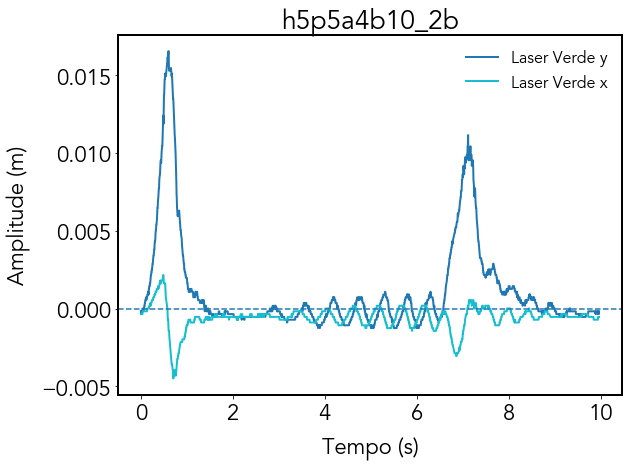

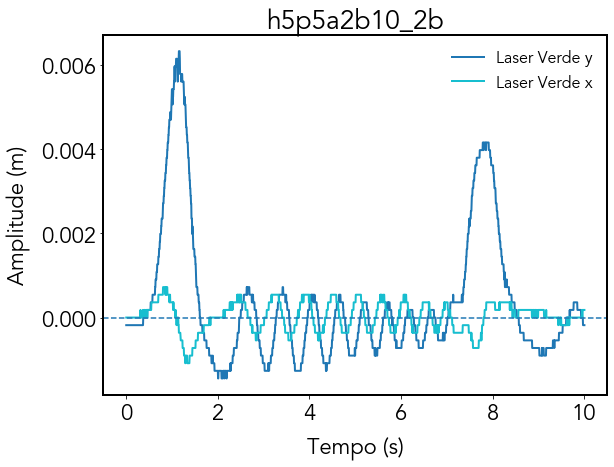

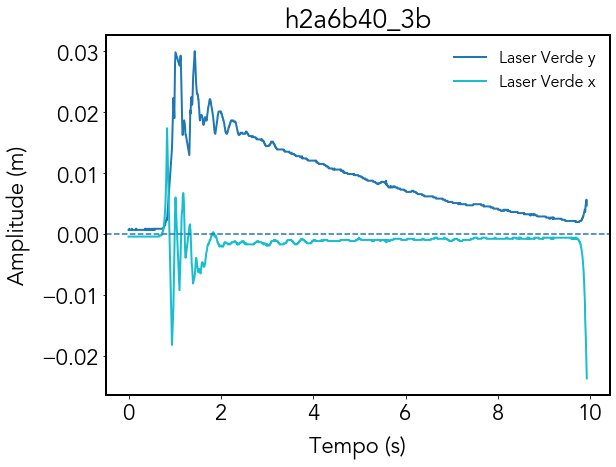

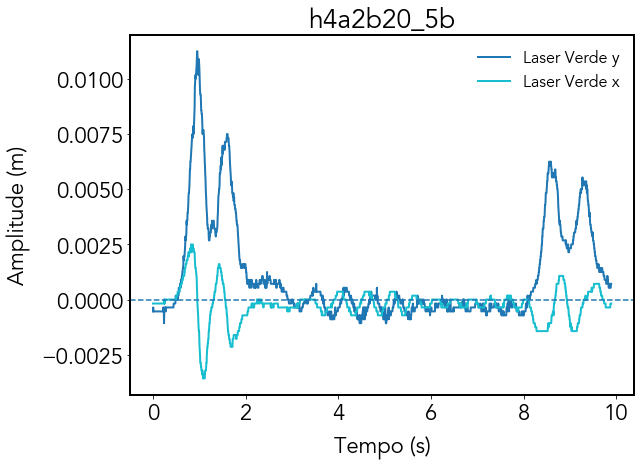

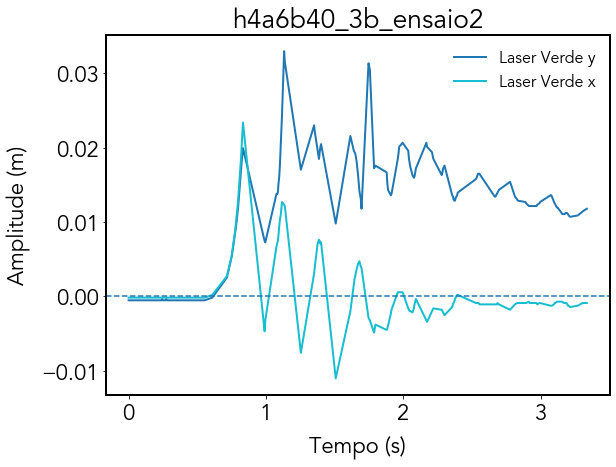

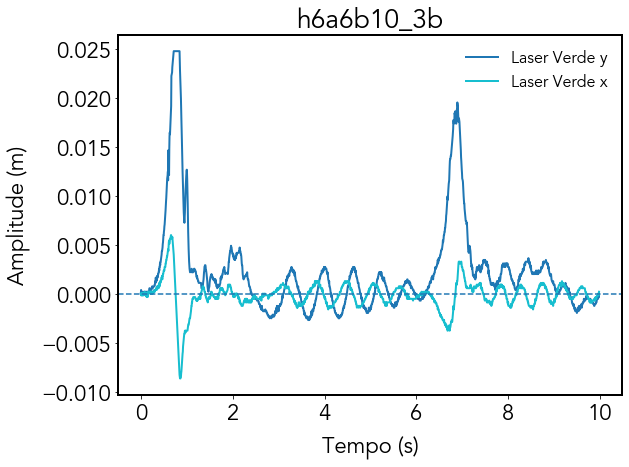

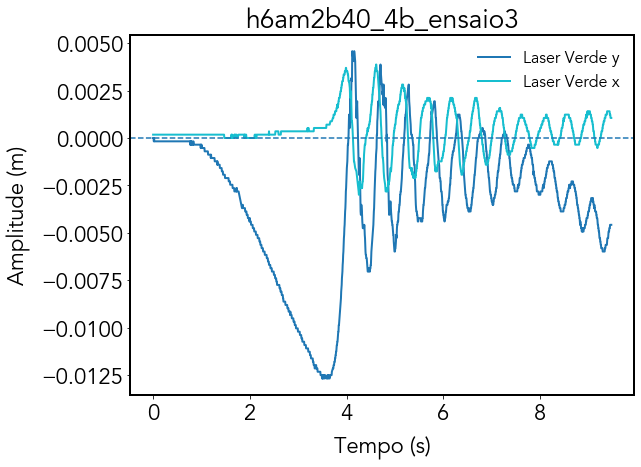

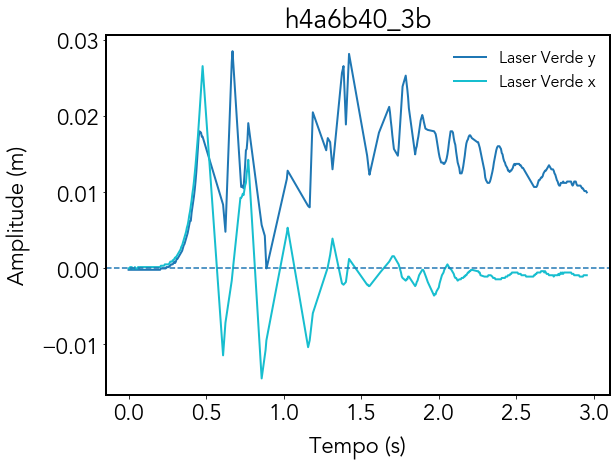

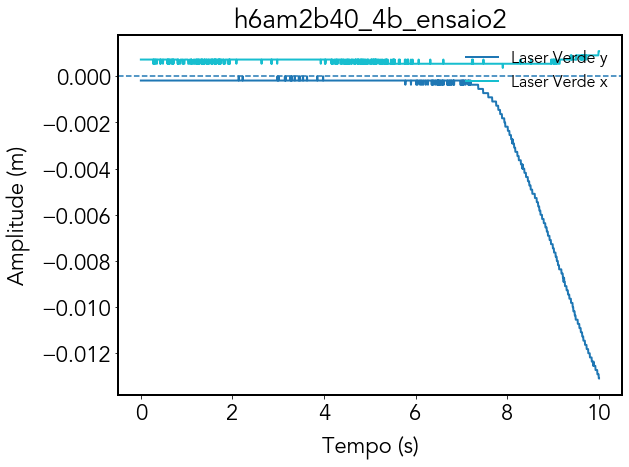

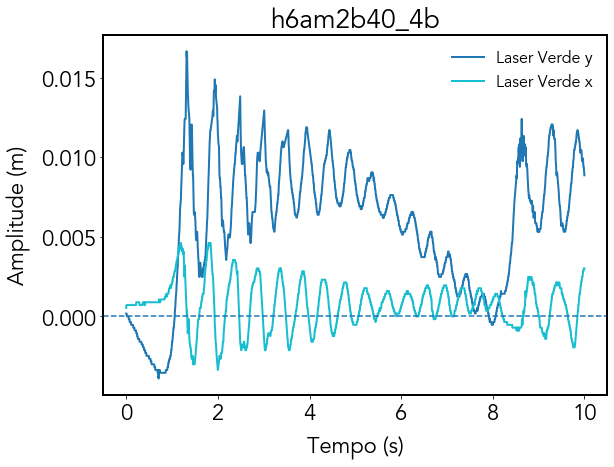

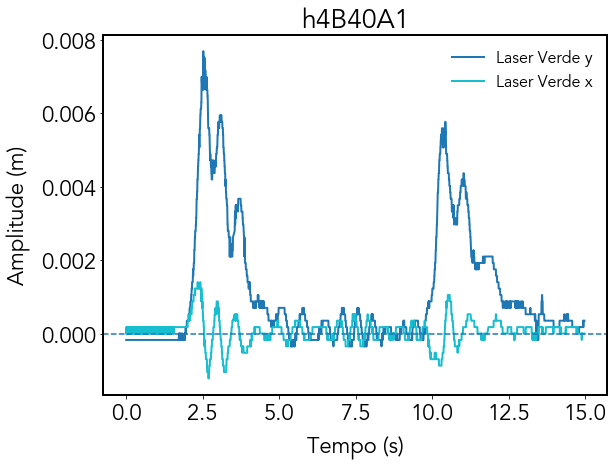

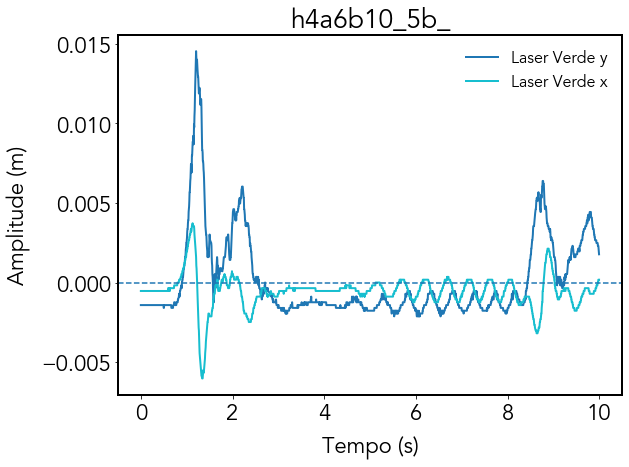

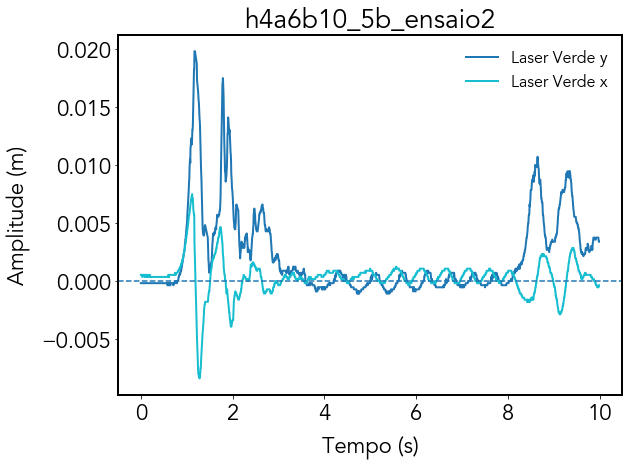

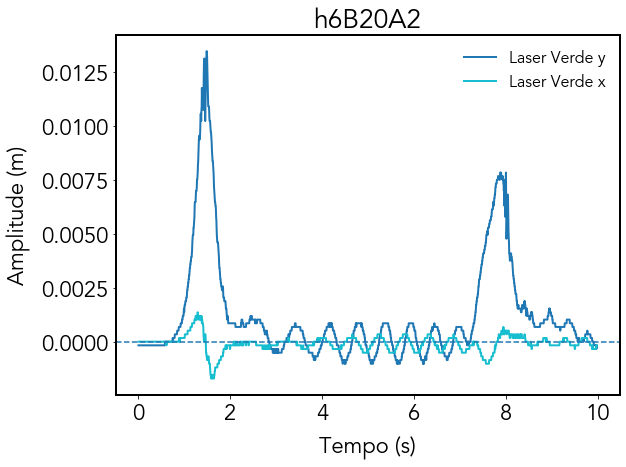

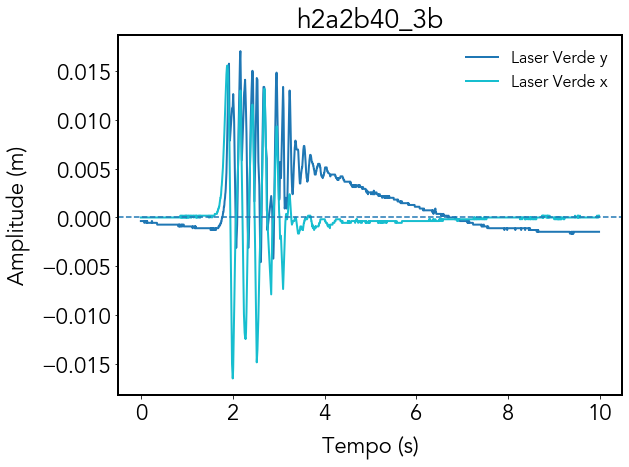

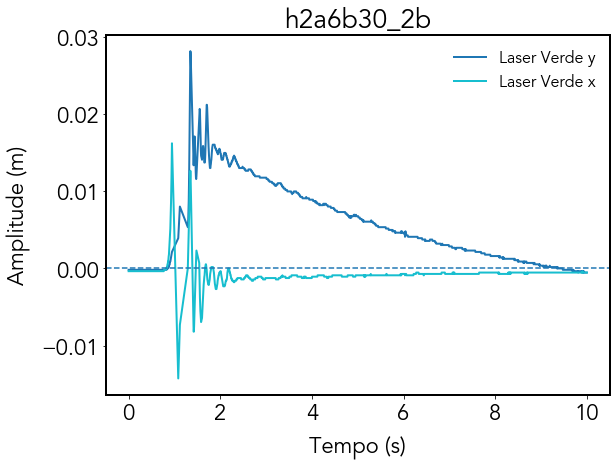

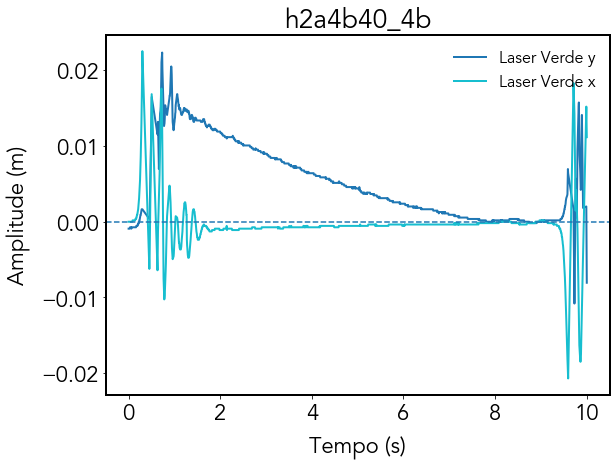

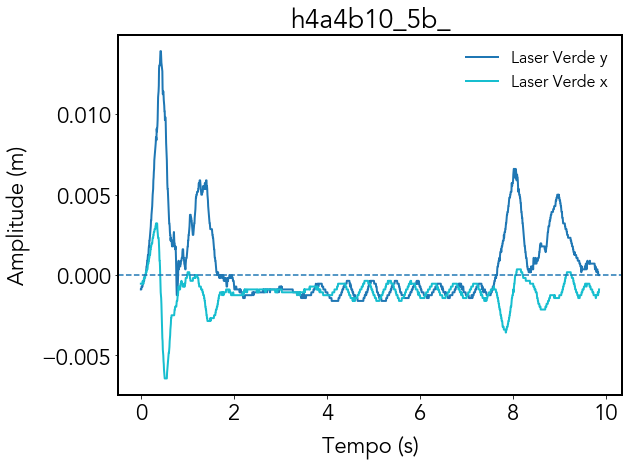

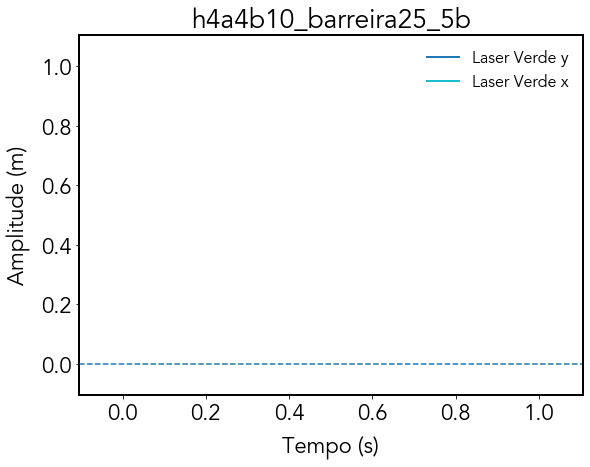

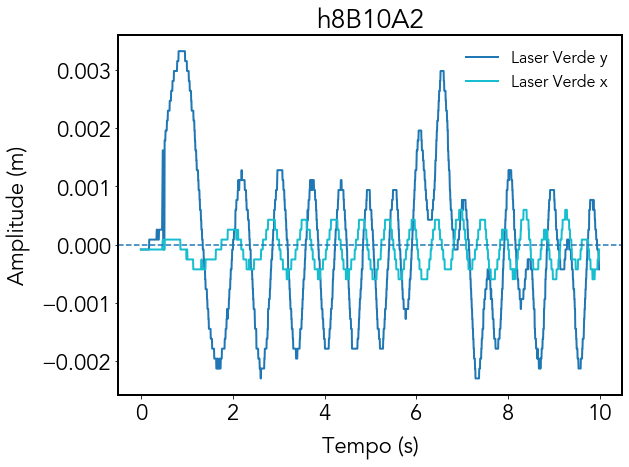

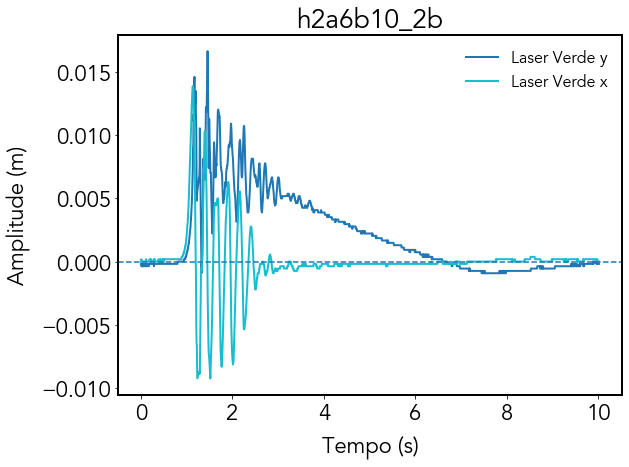

In [4]:
directory = r'Dados'
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        print("found " + str(os.path.join(directory, filename)))
        tempo, cor1_x, cor1_y, cor2_x, cor2_y = read_file(os.path.join(directory, filename))
        save_plot(tempo, cor1_y, cor1_x, filename[:-4])
    

2 plots não sairam bem (**h6am2b40_4b_ensaio2** e **h4a4b10_barreira25_5b**), por isso uma pessoa vai refaze-los

### h6am2b40_4b_ensaio2

É só preciso limitar o plot

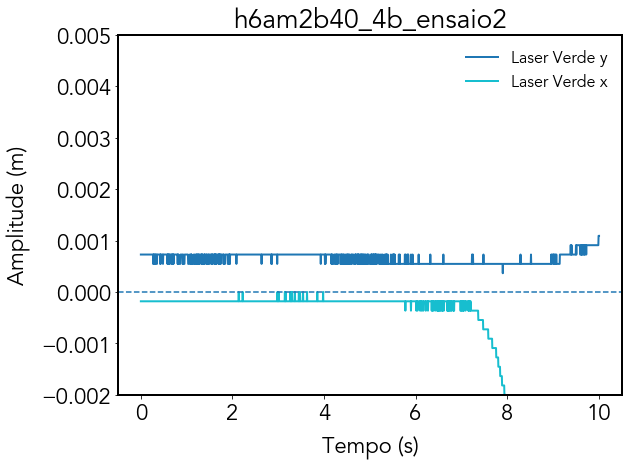

In [5]:
tempo, x, y, trash, trash = read_file('Dados/h6am2b40_4b_ensaio2.txt')
save_plot(tempo, x, y, 'h6am2b40_4b_ensaio2', ylim=[-0.002, 0.005])

### h4a4b10_barreira25_5b

A organização deste ficheiro é diferente dos outros. Tive de mudar a função read_file por causa deste caralho 🙄

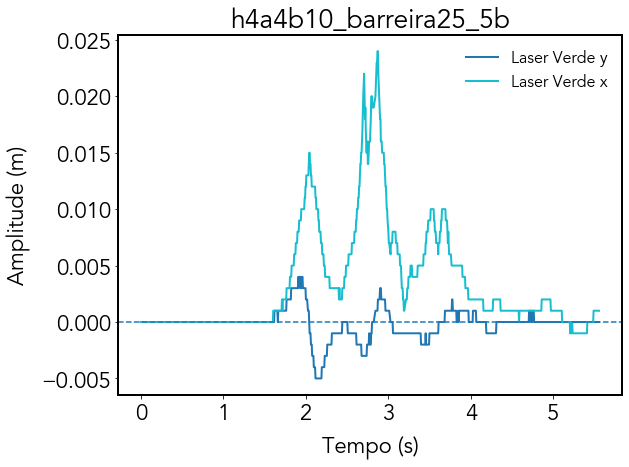

In [6]:
tempo, x, y = read_file('Dados/h4a4b10_barreira25_5b.txt', 3)
save_plot(tempo, x, y, 'h4a4b10_barreira25_5b')